#### Studenti

Đurađ Gvozdenović 1329

Vesna Stojanović 1339


# Tema: Predviđanje kvaliteta belog vina

Korišćeni data set se nalazi na sledećem linku: https://archive.ics.uci.edu/ml/datasets/wine+quality.

## Deskriptivna analiza podataka

### Importovanje potrebnih paketa za rad sa algoritmima nadgledanog učenja

In [4]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

## Ucitavanje data set-a

Klasifikaciju je izvršena na osnovu poslednje kolone (quality) koju trebamo predvideti na osnovu atributa vina.

In [5]:
data_df = pd.read_csv('winequality-white.csv', sep=";")

#### Prikaz broja instanci i atributa u data set-u (rows, columns)

In [31]:
data_df.shape

(4898, 12)

U tabeli se nalaze statističke informacije o atributima (npr: srednju vrednost, standardnu devijaciju, min, max, quartile) belog vina za dati skup podataka.

In [25]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.850668,0.276647,0.332711,6.375749,0.044647,35.147722,138.251895,0.994017,3.187790,0.488966,10.514267,5.877909
std,0.825115,0.094183,0.114629,4.979963,0.015149,16.145547,42.038325,0.002911,0.149359,0.110941,1.230621,0.885639
min,4.323183,0.080000,0.000000,0.600000,0.009000,2.000000,10.866464,0.987110,2.735265,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,9.386392,0.580625,0.697251,21.607588,0.111316,86.329497,265.854851,1.003000,3.641268,0.832224,14.200000,9.000000


### Korelacija


In [7]:
data_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## Provera nedefinisanih vrednosti

Proveravanje atributa sa missing vrednostima (vrednosti koje fale). Sledi dokaz da podaci ne sadrže nedefinisane vrednosti.


In [33]:
def check_missing_vals(data):
    missing_vals = data.isna().sum()
    print(missing_vals)
    return missing_vals.sum() != 0

print("Missing values?:", check_missing_vals(data_df))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Missing values?: False


## Histogrami

Sledeći grafici prikazuju histograme atributa kvaliteta vina.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

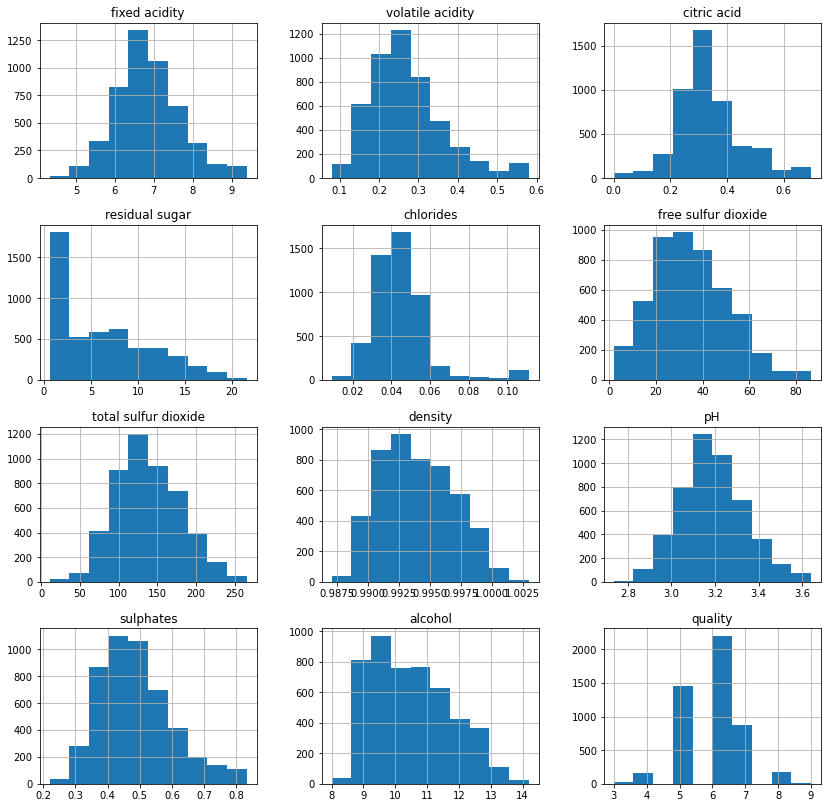

In [34]:
data_df.hist(figsize=(14,14))

## Analiza uticaja atributa na taget value
metodi preuzeti iz materijala sa linka : https://towardsdatascience.com/3-feature-selection-techniques-of-scikit-learn-c9a5f7eb7364

### VarianceThreshold

In [10]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_f.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs        Score
6   total sulfur dioxide  3358.298433
5    free sulfur dioxide   947.712845
3         residual sugar   501.235224
10               alcohol   155.078234
1       volatile acidity    12.622636
0          fixed acidity     7.922042
4              chlorides     2.529005
2            citric acid     0.851118
9              sulphates     0.579206
8                     pH     0.428745


### Recursive Feature Elimination

Ova metoda se bazira na funkcionalnosti ugradjenoj u klasifikatore bazirane na stablima. Pre svega se trenira model sa celim dataset-om, nakon cega se izbacuju feature-i koji imaju najmanji znacaj. Nakon toga se trenira model sa preostalim feature-ima, a ceo proces se ponavlja sve dok ne ostane zeljeni broj feature-a u dataset-u.

[0.0797953  0.09960644 0.08502798 0.08419937 0.08244338 0.09016845
 0.08734809 0.09349632 0.08520866 0.08264808 0.13005792]


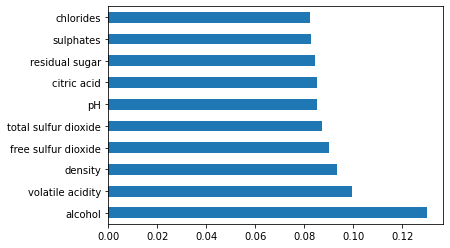

In [11]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X_f,y_f)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_f.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Hitmapa matrice korelacija atributa

Ovde se može uočiti međusobni uticaj atributa jedan na drugi i korelacija između atributa. Na osnovu vrednosti korelacije moguće je izabrati feature koje ćemo koristiti za klasifikaciju.

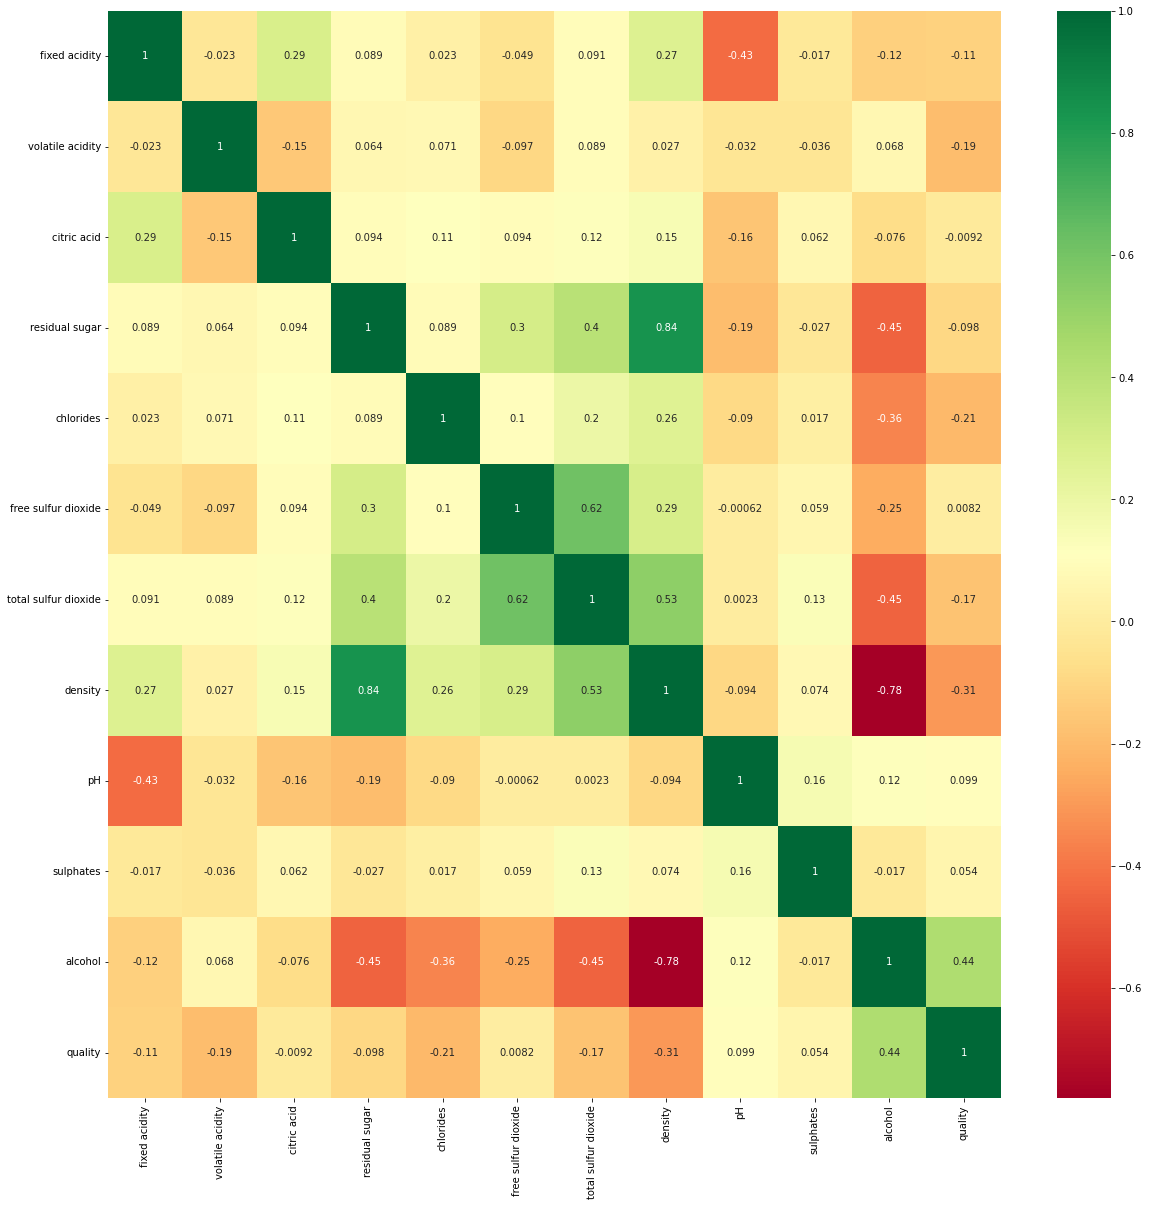

In [12]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Box plot

Tipovi grafika koji prikazuju grupu numeričkih podataka kroz njihove kvartile.
Služe za lakše određivanje outlier-a u daljoj izradi zadatka.

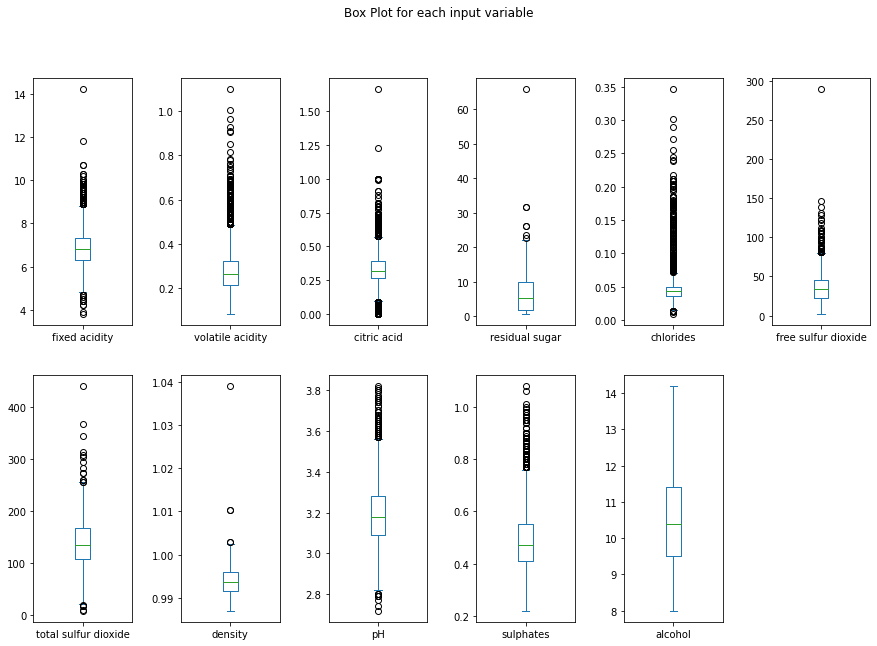

In [13]:

def plot_boxplot(data):
    data_df.drop('quality', axis=1).plot(kind='box', figsize=(15, 10), subplots=True, layout=(2, 6),
                                      sharex=False, sharey=False,
                                      title='Box Plot for each input variable')
    plt.subplots_adjust(wspace=0.5)
    
plot_boxplot(data_df)

### Outlier detection

U primeru ispod prikazane su dve metode sa detekciju outliera: na osnovu IQR-a i 3 standardne devijacije. 
IQR - inter kvartilni opseg pretstavlja razliku između vrednostu prvog i trećeg kvartila i koristi se kako bi se odredile donja i gorna granica za detekciju outlier-a.

Standardna devijacija - prosečno odstupanje od prosečne vrednosti. Ukoliko skup podataka ima normalnu raspodelu u intervalu [mean - 3std, mean + 3std] naći će se 99,7% vrednosti. Ovo pravilo je moguće iskoristiti za eliminaciju preostalih 0,3 procenta vrednosti koje pretstavljaju outlier-e.

Prikazani su rezultati obe metode za detekciju outlier-a, IQR-zeleno i 3 std-crveno. Eksperimantalno je utvrđeno da druga metoda daje bolje rezultate tako da je ona i iskorišćena za eliminaciju outlier-a.

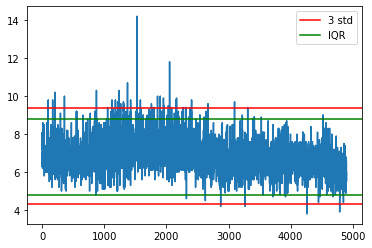

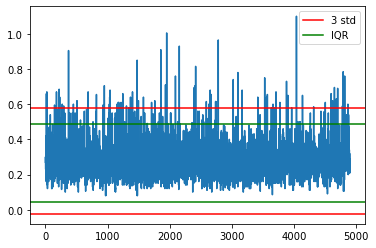

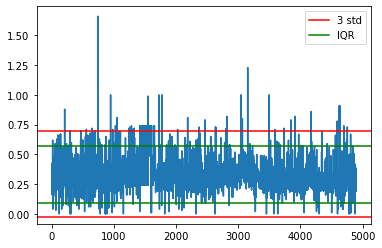

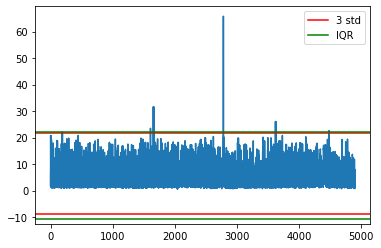

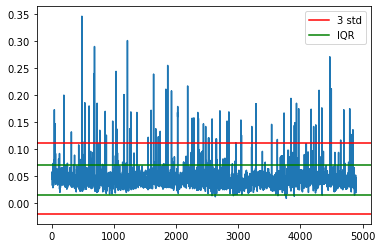

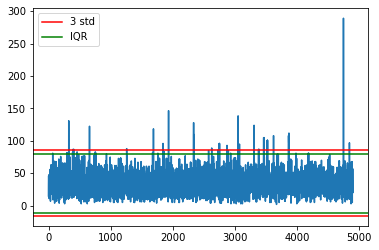

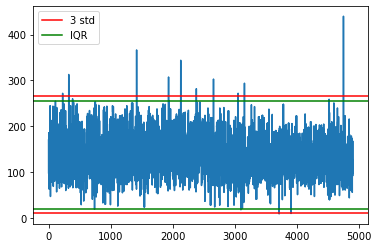

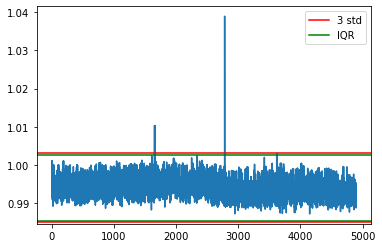

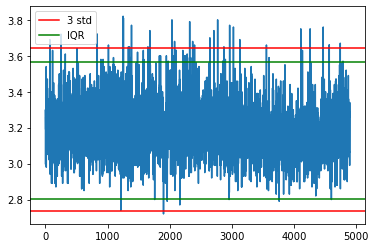

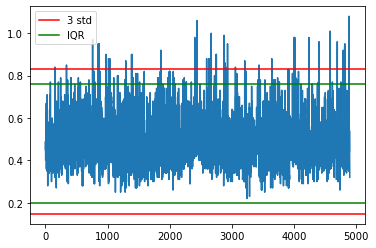

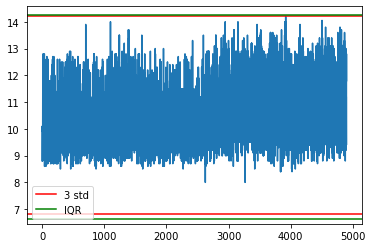

In [14]:
for i in range(data_df.shape[1]-1):

    feature = data_df.iloc[:, i]
    mean = feature.mean()
    std = feature.std()
    
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound_1 = q1 - (iqr * 1.5)
    upper_bound_1 = q3 + (iqr * 1.5)

    plt.figure()
    plt.plot(feature)
    plt.axhline(y=upper_limit, color='r', linestyle='-', label = "3 std")
    plt.axhline(y=lower_limit, color='r', linestyle='-')
    
    plt.axhline(y=lower_bound_1, color='g', linestyle='-', label = "IQR")
    plt.axhline(y=upper_bound_1, color='g', linestyle='-')
    plt.legend()
    plt.show()
    
    for j in range(len(feature)):
        if feature[j] > upper_limit:
            data_df.iloc[j,i] = upper_limit
        if feature[j] < lower_limit:
            data_df.iloc[j,i] = lower_limit
            


## Balansiranje skupa podataka

Na osnovu histograma quality atributa sa slike ispod može se videti da u dataset-u postoje velike varijacije u broju instanci jedne klase. Moguća su dva rešenja za balansiranje ovakvog dataset-a. 

Pristup sa tri klase - svođenje klasa sa opsega [0,10] na opseg [0,1,2]([lose, srednje, dobro]) 

Pristup sa dve klase - svođenje klasa sa opsega [0,10] na opseg [0,1]([lose, dobro]).


<AxesSubplot:>

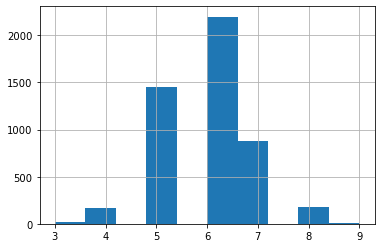

In [15]:
data_df.iloc[:,-1].hist()

### Pristup sa 3 klase

Sve klase koje imaju vrednost manju od 6 postaju klasa 0, klasa 6 postaje klasa 1, a sve klase sa vrednošću većom od 6 postaju klasa 2. Nakon sto je su promenjene vrednosti klasama neke instance iz klasa 0 i 2 su duplirane kako bi se postigao jednak broj instanci za sve 3 klase.

In [16]:
data_df_3c = data_df.copy()
for i in range(len(data_df_3c)):    
    if data_df_3c.iloc[i, -1] == 6:
        data_df_3c.iloc[i, -1] = 1
    elif data_df_3c.iloc[i, -1] < 6:
        data_df_3c.iloc[i, -1] = 0
    else:
        data_df_3c.iloc[i, -1] = 2

In [17]:

length_difference_1_2 = len(data_df_3c[(data_df_3c.quality==1)]) - len(data_df_3c[(data_df_3c.quality==2)])
length_difference_1_0 = len(data_df_3c[(data_df_3c.quality==1)]) - len(data_df_3c[(data_df_3c.quality==0)])
data_df_3c = pd.concat([data_df_3c[(data_df_3c.quality==0)].iloc[:length_difference_1_0, :], data_df_3c])
class_2_duplicate = pd.concat([data_df_3c[(data_df_3c.quality==2)], data_df_3c[(data_df_3c.quality==2)]])
data_df_3c = pd.concat([class_2_duplicate.iloc[:length_difference_1_2, :], data_df_3c])

<AxesSubplot:>

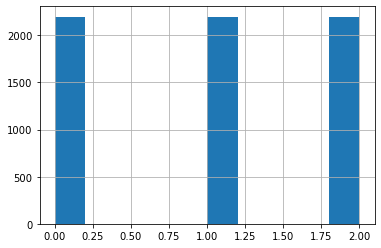

In [18]:
data_df_3c.iloc[:,-1].hist()


### Pristup sa 2 klase

Sve klase koje imaju vrednost manju od 6 postaju klasa 0, a sve klase sa vrednošću većom od 6 postaju klasa 1. Nakon sto je su promenjene vrednosti klasama neke instance iz klasa 0 su duplirane kako bi se postigao jednak broj instanci za obe klase.

In [19]:
data_df_2c = data_df.copy()
for i in range(len(data_df_2c)):    
    if data_df_2c.iloc[i, -1] < 6:
        data_df_2c.iloc[i, -1] = 0
    else:
        data_df_2c.iloc[i, -1] = 1

In [20]:
length_difference = len(data_df_2c[(data_df_2c.quality==1)]) - len(data_df_2c[(data_df_2c.quality==0)])
data_df_2c = pd.concat([data_df_2c[(data_df_2c.quality==0)].iloc[:length_difference, :], data_df_2c])

<AxesSubplot:>

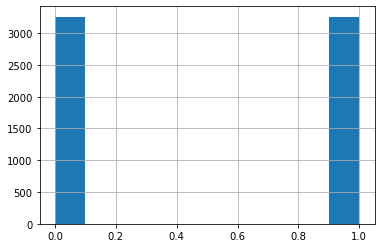

In [21]:
data_df_2c.iloc[:,-1].hist()

## Primena modela klasifikacije
## Pristup sa dve klase
### podela na train i test skupove podataka  pri čemu se za train skup koristi 80% data seta, a za test skup se koristi 20% data seta


In [22]:
prepared_df = data_df_2c.copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### SVM

SVM je algoritam za klasifikaciju ili regresiju koji kreira liniju ili multidimenzionalnu ravan koja deli i odvaja podatke u klase.
Ovaj algoritam je pored Random Forest-a davao najbolje rezultate sa dve korišćene klase.

In [39]:

clf = svm.SVC(kernel = "rbf",gamma="auto", C=100, shrinking=False, probability=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       641
           1       0.91      0.84      0.88       663

    accuracy                           0.88      1304
   macro avg       0.88      0.88      0.88      1304
weighted avg       0.88      0.88      0.88      1304



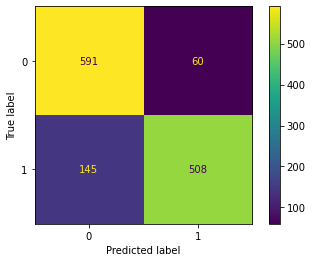

In [24]:
plot_confusion_matrix(clf, X_test, y_test)

### Random forest

Ovaj algoritam se koristi kod klasifikacije i regresije. On gradi stabla odlučivanja na različitim uzorcima a vrednost klase odlučuje na osnovu većine glasova svih stabala odluke za klasifikaciju i prosek u slučaju regresije. 
Ovaj algoritam daje najbolje rezultate sa postojećim data set-om.

In [167]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.92       656
           1       0.95      0.89      0.92       648

    accuracy                           0.92      1304
   macro avg       0.92      0.92      0.92      1304
weighted avg       0.92      0.92      0.92      1304



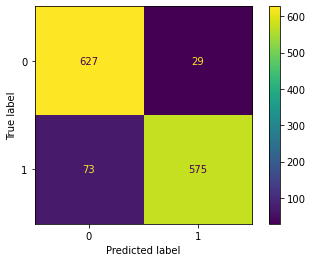

In [168]:
plot_confusion_matrix(rf, X_test, y_test)

### KNN

Ovaj algoritam se koristi kod klasifikacije i regresije. 
Broj najbližih suseda novoj nepoznatoj promenljivoj koja se mora predvideti ili klasifikovati je označen simbolom 'K'.

In [122]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       418
           1       0.75      0.61      0.68       428
           2       0.83      0.93      0.88       473

    accuracy                           0.78      1319
   macro avg       0.78      0.78      0.77      1319
weighted avg       0.78      0.78      0.78      1319



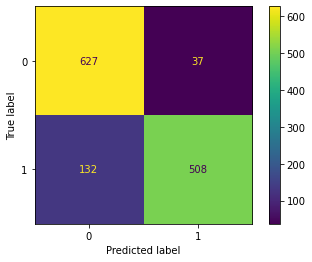

In [92]:
plot_confusion_matrix(knn, X_test, y_test)

### Naive Bayes

Ovaj algoritam daje najslabije rezultate u odnosu na ostale korišćene algoritme klasifikacije.
Naivni Bajesov klasifikator je jedan od jednostavnih i najefikasnijih klasifikacionih algoritama koji pomaže u izgradnji brzih modela mašinskog učenja koji mogu brzo da predviđaju. Ovo je probabilistički klasifikator,to jest predviđa na osnovu verovatnoće nekog objekta.


In [99]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       638
           1       0.71      0.68      0.69       666

    accuracy                           0.69      1304
   macro avg       0.69      0.69      0.69      1304
weighted avg       0.69      0.69      0.69      1304



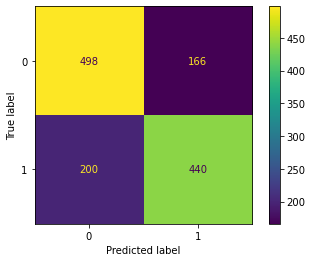

In [94]:
plot_confusion_matrix(gnb, X_test, y_test)

## Pristup sa tri klase



In [136]:
prepared_df = data_df_3c.copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## SVM

Ovaj algoritam pored Random Forest-a daje najbolje rezultate pri analizi i kod pristupa sa tri klase.

In [105]:
clf = svm.SVC(kernel = "rbf",gamma="auto", C=100, shrinking=False, probability=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       418
           1       0.76      0.63      0.69       428
           2       0.84      0.95      0.89       473

    accuracy                           0.80      1319
   macro avg       0.79      0.79      0.79      1319
weighted avg       0.79      0.80      0.79      1319



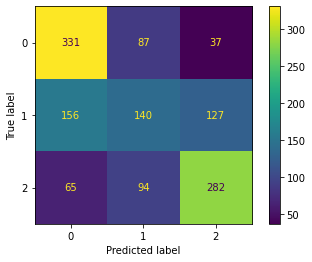

In [97]:
plot_confusion_matrix(clf, X_test, y_test)

### Random forest

Ovaj algoritam ponovo daje najbolje rezultate i pri korišćenju pristupa sa tri klase.

In [137]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       416
           1       0.79      0.66      0.72       444
           2       0.84      0.93      0.88       459

    accuracy                           0.82      1319
   macro avg       0.81      0.82      0.81      1319
weighted avg       0.81      0.82      0.81      1319



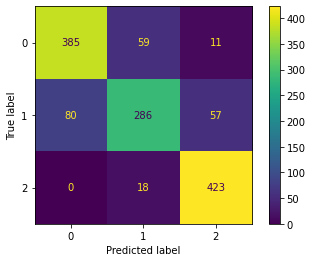

In [99]:
plot_confusion_matrix(rf, X_test, y_test)

### KNN

In [103]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       418
           1       0.75      0.61      0.68       428
           2       0.83      0.93      0.88       473

    accuracy                           0.78      1319
   macro avg       0.78      0.78      0.77      1319
weighted avg       0.78      0.78      0.78      1319



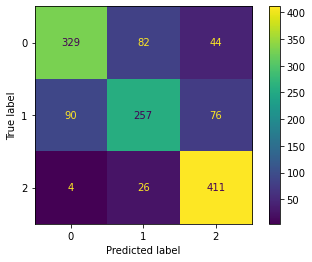

In [101]:
plot_confusion_matrix(knn, X_test, y_test)

### Naive Bayes

Ovaj algoritam i pri pristupu sa tri klase daje najslabije rezultate u odnosu na ostale korišćene algoritme klasifikacije.

In [104]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62       418
           1       0.44      0.20      0.27       428
           2       0.58      0.76      0.66       473

    accuracy                           0.55      1319
   macro avg       0.53      0.55      0.52      1319
weighted avg       0.53      0.55      0.52      1319



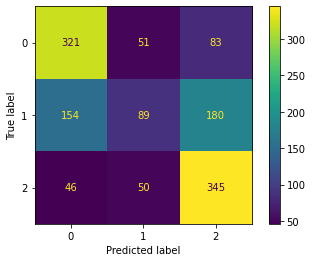

In [103]:
plot_confusion_matrix(gnb, X_test, y_test)

### Pristup sa redukovanim brojem parametara

Testiranje Random Forest-a, koji je davao najbolje rezultate u analizi, i atributa koji su dali najbolje rezultate pri  VarianceThreshold analizi a to su: total sulfur dioxide , free sulfur dioxide, residual sugar, alcohol.

In [37]:
prepared_df = data_df_2c.iloc[:, [6,5,3,10,11]].copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       641
           1       0.96      0.83      0.89       663

    accuracy                           0.90      1304
   macro avg       0.90      0.90      0.90      1304
weighted avg       0.90      0.90      0.90      1304

